Ｋ近傍法は識別平面の式を生成しないタイプのクラス分類手法。  
式を生成しないため、ノンパラパラメトリックモデルであり、怠惰学習と呼ばれることもある。

データはkernel approximationと同様にXORを使う。

In [1]:
# ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import neighbors, metrics, preprocessing, cross_validation #機械学習用のライブラリを利用
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from sklearn.kernel_approximation import RBFSampler #カーネル近似用の関数
from matplotlib.colors import ListedColormap #plot用

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,1
9,1


<function matplotlib.pyplot.show>

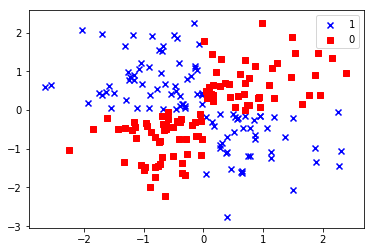

In [3]:
# プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [4]:
# データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

# 正規化
sc = preprocessing.StandardScaler()
sc.fit(X_std)
X_std = sc.transform(X_std)

識別器としてKNeighborsClassifierを使用する。

識別したい点から何点の近傍を考慮するのかを、n_neighbors = 5で設定する。  
またweightsは近傍にあった5点を評価するさいに、’uiform’だと点までの距離を考慮しない。  
一方weightsを’distance’にすると距離も考慮して、分類を決定するようになる。

In [5]:
# 機械学習で分類する---------------------------------------------------
n_neighbors = 5
clf_result=neighbors.KNeighborsClassifier(n_neighbors, weights = 'distance') #weights = 'uniform'

In [6]:
# K分割交差検証（cross validation）で性能を評価する---------------------
scores=cross_validation.cross_val_score(clf_result, X_std, z, cv=10)
print("平均正解率 = ", scores.mean())
print("正解率の標準偏差 = ", scores.std())

平均正解率 =  0.9499749373433584
正解率の標準偏差 =  0.03164267349739748


正答率 =  0.9


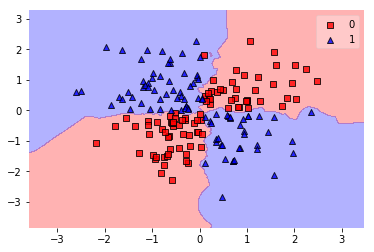

In [7]:
# トレーニングデータとテストデータに分けて実行してみる------------------
X_train, X_test, train_label, test_label=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)
clf_result.fit(X_train, train_label)

#正答率を求める
pre=clf_result.predict(X_test)
ac_score=metrics.accuracy_score(test_label,pre)
print("正答率 = ",ac_score)

#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(train_label)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(test_label)
plot_decision_regions(X_train_plot, train_label_plot, clf=clf_result, res=0.01) #学習データをプロット

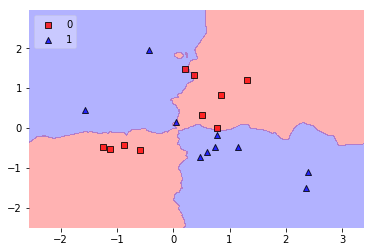

In [8]:
plot_decision_regions(X_test_plot, test_label_plot, clf=clf_result, res=0.01, legend=2) #テストデータをプロット

#### K近傍法とは
 - [k-nearest neighbor algorithm:sklearn](http://scikit-learn.org/stable/modules/neighbors.html)
 - [k-nearest neighbor algorithm:sklearn](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

K近傍法では識別したいデータ点から、距離が近いK点の学習データを探し、K点のうち一番ラベルが多かったクラスを識別結果とする。

アルゴリズムは非常に単純で、精度も程々に良い。  
欠点として、識別平面が式で表現できない（ノンパラメトリック手法と呼ぶ）。  
そのため、新たな点を分類したい場合、学習データすべてと距離を計算する必要がある。  

多くの機械学習では、学習に時間がかかっても識別は一瞬で可能であるが、K近傍法では識別に時間がかかる。  
また識別平面の式がないので、どのパラメータがどう重要なのかの意味付けが得られにくい。

ただ分類したいだけなら非常に強力な手法となる。